# **Loan Default Prediction**


##<b>Problem Statement</b>
A bank's consumer credit department aims to simplify the decision-making process for home equity
lines of credit to be accepted. To do this, they will adopt the Equal Credit Opportunity Act's
guidelines to establish an empirically derived and statistically sound model for credit scoring. The
model will be based on the data obtained via the existing loan underwriting process from recent
applicants who have been given credit. The model will be built from predictive modeling techniques,
but the model created must be interpretable enough to provide a justification for any adverse
behavior (rejections).

##<b>Problem Definition</b>
**The context:** This is an important problem to solve from the banks point of view because a large portion of their profit comes from the interest earn from home loans. Home loans tend to be in the hundreds of thousands, if not millions of dollars, thus defaults are very expensive. Creating a model that allows customers' creditworthiness to be assessed quickly and accurately will save money and time in the application process as well as improve profit by approving good loans and rejecting high risk ones. Additionally, the goal is to make a model that is free of the implicit biases that people may have when they approve loans manually (whether based on race, ethnicity, gender, etc), which will also save money and reputation by avoiding law suits for discrimination <br><br><br>
**The objectives:** The intended goal of this project is to create a predictive model that will improve the accuracy of rejecting high risk loans, while also improving the accuracy and efficiency of approving good loans. Since it is riskier for the bank to approve a loan that ends up defaulting than to deny a loan that would have paid on time, we will focus primarily on making sure we have high recall, meaning the accuracy on declining risky loans is high?<br><br><br>
**The key questions:** The key questions that need to be answered are: 
<br><br>
What is our current success/error rate. This will define whether the model is an improvement or not
<br><br>
What are the most most important determinants of whether a loan will default or not
<br><br>
What is the actual model that we will be deploying to solve this problem going forward
<br>
<br>
**The problem formulation:** The problem we are trying to solve is how can we predict who will most likely default on home loans, and reduce the amount of loans we are providing to likely defaulters. We are trying to do this through creating a machine learning algorithm that is free of human biases, and also more efficient than the current manual process

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score, precision_recall_curve

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [ ]:
hm=pd.read_csv("hmeq.csv")

In [ ]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [ ]:
data.shape

(5960, 13)

**Insights**

The data set is 5960 records and 13 features. There are missing values so some pre processing and clean up will be neccesary

### **Check the data types of the columns**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**

Except for Reason and Job, which are objects, all of the data is numerical. There are quite a few missing values

### **Check for missing values**

In [ ]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
(data.isnull().sum()/data.shape[0])

BAD        0.000000
LOAN       0.000000
MORTDUE    0.086913
VALUE      0.018792
REASON     0.042282
JOB        0.046812
YOJ        0.086409
DEROG      0.118792
DELINQ     0.097315
CLAGE      0.051678
NINQ       0.085570
CLNO       0.037248
DEBTINC    0.212584
dtype: float64

**Insights **

Debt to income has the most missing data (21%), followed by number of derogatory reports (12%), number of delinquent credit lines (10%), and Mortgage (9%) due

### **Convert the data types**

In [ ]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [ ]:
cols

['REASON', 'JOB', 'BAD']

In [ ]:
# Changing the data type of object type column to category. hint use astype() function
# remove ___________ and complete the code

for i in cols:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [ ]:
data.describe()

NameError: ignored

**Insights**

*   The mean loan amount is 18607, but given the median is 16300 is tends to skew higher (right), with a few large outliers

*   Mortgage due has a median of 65000 and skews right. The max is almost 400k

*   the median property value is 90k with 75% under 120k. There are a few outliers that make the distribution skew rightward 




*   Years at job has a median of 7, but skews right. 75% are 13 or under, but there are some extreme values, and a max of 41

*   Most people have no degogatory reports, with a few exceptions, and a max of 15


*   the median age of credit lines is 173 months, but there are a few outliers that make it skew rightward/ 75% are under 231 months

*   Most customers have 2 or less recent credit inquiries, 


*   Credit lines are close to normally distributed, with 50% of customers having between 15 and 26

*   Debt to income ratio is close to normally distributed, with 50% of customers having between a 29 and 39, with the mean at 34








In [ ]:

data.describe(include='category').T


NameError: ignored

**Insights **

*    4771 out of 5960 of the loans were good loans, therefore about 20% defaulted. This means that if we create a model that gives us better results that 20%, in an efficient manner, then we have succeeded 

*   68% of the reasons for taking a loan were for debt consoladation

 
*   There are 6 different jobs that have been listed, with Other as the top choice


**Let's look at the unique values in all the categorical variables**

In [ ]:


cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*40)

In [ ]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize=True))
    print('*'*40)

**Insights **



1.   Home improvement is the other reason for taking out a loan.
2.   ProfExe Office, and manager are the top jobs after Other




## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

In [ ]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

NameError: ignored

**Insights**

Loan amounts tend to be between about 100 and 250k, with the majority under 400. There are quite a few outliers that go up to almost 900k

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

In [ ]:
num_cols_minus_loan = ['MORTDUE',	'VALUE',	'YOJ',	'DEROG',	'DELINQ',	'CLAGE',	'NINQ',	'CLNO',	'DEBTINC']

for i in num_cols_minus_loan:
  histogram_boxplot(data[i])

**Insights**



*   Customer tend to have less than 150k mortgage due, but there are outliers up to 400k

*   The current value of most of the properties is under 200k, but there are outliers up to 900k



*   Most have under 11 years on the job, and almost everyone is under 30 years, but there are a few outliers

*   Most customers have no derogatory or delinquant reports

*   Most customers' oldest credit line is less than 400 months
*   Most have less than 5 recent credit inquiries, with 75% of customers at 2 or less



1.   75% of customer have less than 25 credit lines open, and anything over the low 40s is an outlier
2.   Debt to income ratios tend to range from 10 to 50, with some outliers above and below that threshold









### **2. Univariate Analysis - Categorical Data**

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

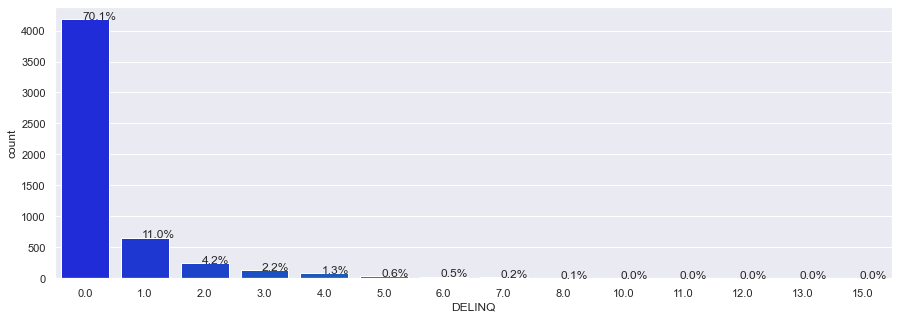

In [ ]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights **

85% of customers have had 2 or less dilenquent credit lines 

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

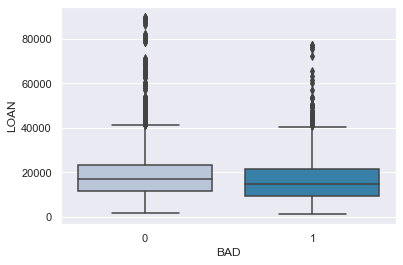

In [ ]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights**

There does not seem to be much difference in loan value for bad vs good loans

####**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

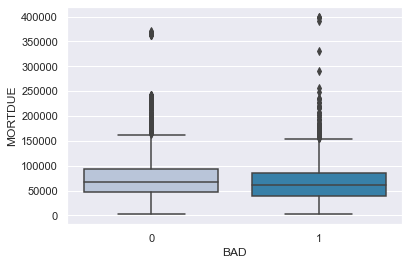

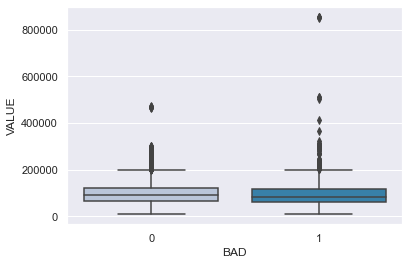

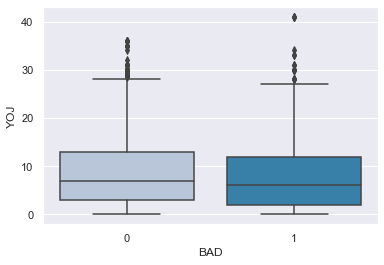

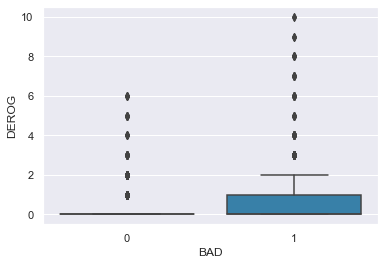

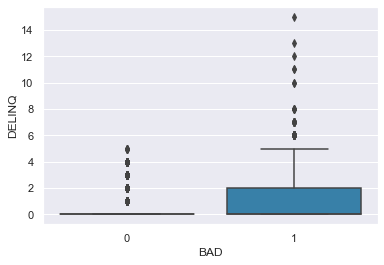

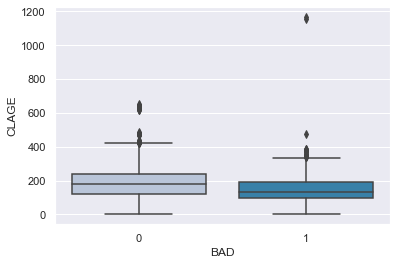

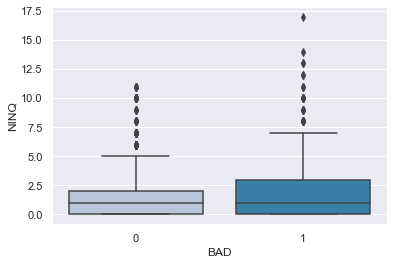

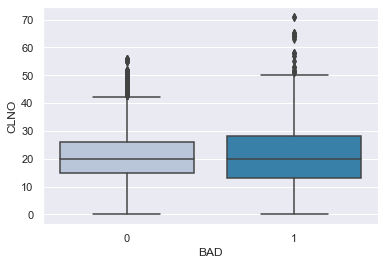

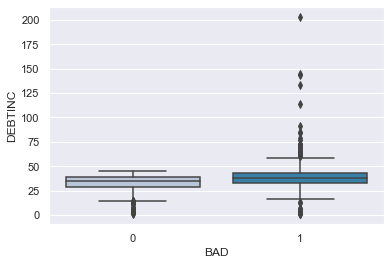

In [ ]:
num_cols_minus_loan

for i in num_cols_minus_loan:
  sns.boxplot(data["BAD"],data[i],palette="PuBu")
  plt.show()

**Insights**

The areas where we see the biggest difference between good loans and defaulters are the number of delinquent credit lines and derogatory reports. Unsurprisingly, customers who have had past credit issues tend to continue to have credit issues at a higher rate

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

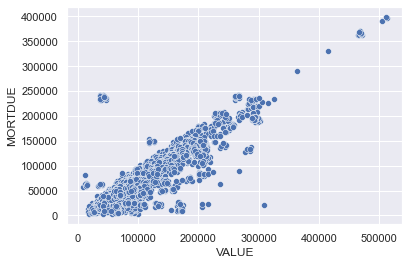

In [ ]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights**

There is a high correlation (.88) between mortgage amount due and value of property

<AxesSubplot:>

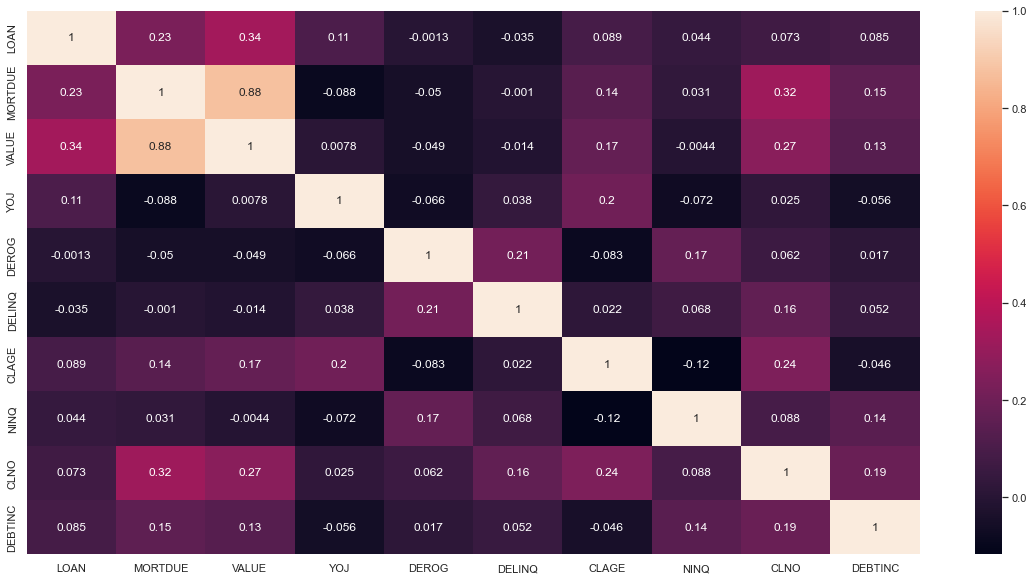

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot=True, )

**Insights**

There is a high correlation between value of someones property and the mortgage due, as a more expensive property tends to have more owed on it

There are moderate correlations between 

Loan Amount and: Amount due on mortgage, property value  

Mortgage amount due and: NUmber of existing credit lines

Property value and existing credit lines

Deerogatory reports and delinquencies

credit line age and: years on job and credit line number

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):

   
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


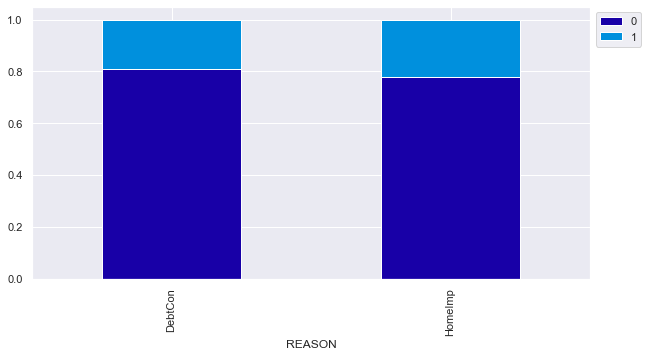

In [ ]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights**

There is a slightly higher rate of defaults for customers taking loans for home improvement

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


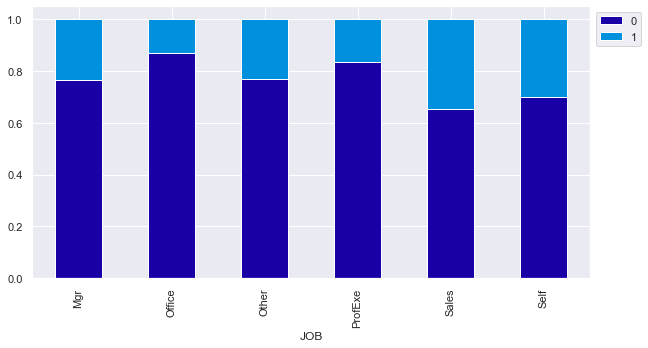

In [ ]:
stacked_plot(data['JOB'])

**Insights**

There is a much higher rate of default for people employeed in sales or self employed, and a lower rate for office and prof exe workers

#### Treating Outliers

In [ ]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR= Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5* IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [ ]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw, numerical_col)



#### Adding new columns in the dataset for each column which has missing values 

In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [ ]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)

df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,True
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600.0,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,False,False,False,False,False,False,False,False,False,False
5956,0,41600.0,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,False,False,False,False,False,False,False,False,False,False
5957,0,41600.0,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,False,False,False,False,False,False,False,False,False,False
5958,0,41600.0,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,False,False,False,False,False,False,False,False,False,False


#### Filling missing values in numerical columns with median and mode in categorical variables

In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.

df[num_data.columns] = num_data.fillna(num_data.median())



# Fill object columns with model.

for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500.0,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600.0,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,False,False,False,False,False,False,False,False,False,False
5956,0,41600.0,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,False,False,False,False,False,False,False,False,False,False
5957,0,41600.0,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,False,False,False,False,False,False,False,False,False,False
5958,0,41600.0,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,False,False,False,False,False,False,False,False,False,False


## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?
Since this is a classicification problem, then techniques that will be explored are logistic regression, K-Nearest neighbors, Decision trees, Random Forest, and potentially some of the boosted ensemble algorithms

**2. Overall solution design** - One of the major goals of this project is to make it interpretable, so throughout the process of creating and testing the different models, I will be indentifying the features that have the most impact on a customers probability of defaulting. This will allow us to rank the different attributes on their importance for rejecting a potentially bad loan so that stakeholders can understand what some of the key determinents of rejection are, and show that there is no bias based on demographics. A model that performs the best and most efficiently based on these determinants will also be delivered   

**3. Measures of success** - The key measure of success is the recall for Bad loans (BAD = 1). Since giving a customer a loan that they will end up defaulting on is more costly to the bank than passing up on giving a customer a loan that they end up paying in full, we will focus on identifying as many defaulters (True positives) as possible

In [ ]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500.0,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600.0,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,False,False,False,False,False,False,False,False,False,False
5956,0,41600.0,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,False,False,False,False,False,False,False,False,False,False
5957,0,41600.0,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,False,False,False,False,False,False,False,False,False,False
5958,0,41600.0,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,False,False,False,False,False,False,False,False,False,False


# **Milestone 2**



## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [ ]:
#dropping the target variable and the missing valye flags to create an X dataset for training and testing
#x= df.drop(columns=['BAD', 'MORTDUE_missing_values_flag',
#       'VALUE_missing_values_flag', 'REASON_missing_values_flag',
 #      'JOB_missing_values_flag', 'YOJ_missing_values_flag',
  #     'DEROG_missing_values_flag', 'DELINQ_missing_values_flag',
   #    'CLAGE_missing_values_flag', 'NINQ_missing_values_flag',
    #   'CLNO_missing_values_flag', 'DEBTINC_missing_values_flag'] )
x= df.drop(columns='BAD')

In [ ]:
#creating a data set of just the target variable
y = df['BAD']

In [ ]:
#creating dummies for all categorical variables
x=pd.get_dummies(x, drop_first= True)

In [ ]:
x

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,...,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100.0,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,...,False,False,False,True,1,0,1,0,0,0
1,1300.0,70053.0,68400.0,7.0,0.0,0.0,121.833333,0.0,14.0,34.818262,...,False,False,False,True,1,0,1,0,0,0
2,1500.0,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,...,False,False,False,True,1,0,1,0,0,0
3,1500.0,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,...,True,True,True,True,0,0,1,0,0,0
4,1700.0,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,...,False,False,False,True,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,41600.0,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,...,False,False,False,False,0,0,1,0,0,0
5956,41600.0,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,...,False,False,False,False,0,0,1,0,0,0
5957,41600.0,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,...,False,False,False,False,0,0,1,0,0,0
5958,41600.0,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,...,False,False,False,False,0,0,1,0,0,0


In [ ]:
# creating 70% training and 30% testing data sets for both the x and y, and stratified to keep the same mix of good and bad loans
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 22, stratify= y)



In [ ]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Eligible for Loan', 'Not Eligible'], yticklabels=['Eligible for Loan', 'Not Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
x_train

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,...,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
1394,10800.0,32870.0,61572.0,7.0,0.0,0.0,173.466667,1.0,20.0,38.490247,...,True,True,True,False,0,0,0,0,0,0
2089,13200.0,70069.0,88303.0,3.0,0.0,0.0,240.856017,2.0,25.0,29.064128,...,False,False,False,False,0,0,1,0,0,0
5104,27300.0,65019.0,37531.0,22.0,0.0,0.0,82.660269,2.0,14.0,29.609848,...,False,False,False,False,1,0,1,0,0,0
556,7400.0,65032.0,83184.0,15.0,0.0,0.0,230.420256,1.0,35.0,35.415113,...,False,False,False,False,1,0,1,0,0,0
2053,13000.0,60000.0,86400.0,12.0,0.0,0.0,149.166667,0.0,28.0,34.818262,...,False,False,False,True,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,13100.0,59608.0,72561.0,28.0,0.0,0.0,195.538711,1.0,24.0,36.611073,...,False,False,False,False,1,0,1,0,0,0
3734,19800.0,56745.0,83146.0,11.0,0.0,0.0,85.253619,0.0,10.0,14.345367,...,False,False,False,False,0,0,1,0,0,0
4500,23500.0,65019.0,131203.0,0.0,0.0,0.0,318.847130,3.0,21.0,31.084156,...,False,False,False,False,1,0,1,0,0,0
3145,17000.0,6778.0,60065.0,0.0,0.0,0.0,326.518414,0.0,5.0,38.836602,...,False,False,False,False,0,0,0,0,1,0


## Logistic Regression

The first model I am creating and testing is the logistic regression model. 

In [ ]:
lg = LogisticRegression()
lg.fit(x_train, y_train)


LogisticRegression()

In [ ]:
#checking perfomance on trainng data by predicting scores based on fitted model
y_pred_train = lg.predict(x_train)


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3340
           1       0.00      0.00      0.00       832

    accuracy                           0.80      4172
   macro avg       0.40      0.50      0.44      4172
weighted avg       0.64      0.80      0.71      4172



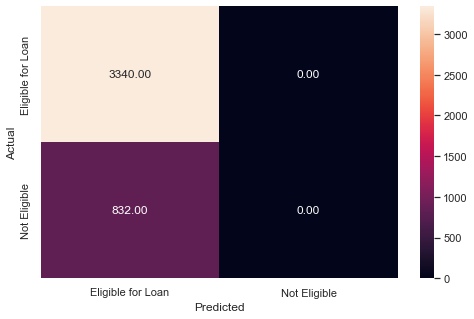

In [ ]:
#Scoring for the model on the training set
metrics_score(y_train, y_pred_train)

**The recall on the logistic model on the training set is 0, meaning it is not correctly predicting any Bad loans. This model as it stands is as inaccurate as the initial dataset**

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1431
           1       0.00      0.00      0.00       357

    accuracy                           0.80      1788
   macro avg       0.40      0.50      0.44      1788
weighted avg       0.64      0.80      0.71      1788



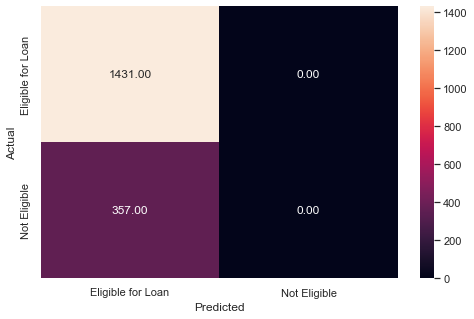

In [ ]:
#scoring for the model on the test data
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

**Recall is 0 on the test data as well. Poor model**

In [ ]:
#Checking the importance of features
cols = x.columns


In [ ]:
coef_lg = lg.coef_

pd.DataFrame(coef_lg, columns = cols).T.sort_values(by=0, ascending= False)

,0
DEBTINC_missing_values_flag,6.884167e-05
NINQ,6.328249e-05
VALUE_missing_values_flag,1.089605e-05
JOB_Self,4.534998e-06
JOB_Sales,8.427494e-07
CLAGE_missing_values_flag,5.511451e-07
VALUE,1.945579e-07
DELINQ,0.000000e+00
DEROG,0.000000e+00
CLNO_missing_values_flag,-5.511228e-07


**This model is very poorly performing, so the results of the feature importance can be taken with a grain of salt. Debt to income ratio missing, The number of inquiries, the value of the property being missing,as well as being self employeed or a sales employee are the most important features accoriding to this model**

In [ ]:
# Calulating the odds of each feature resulting in a default
odds = np.exp(lg.coef_[0])

In [ ]:
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
DEBTINC_missing_values_flag,1.000069
NINQ,1.000063
VALUE_missing_values_flag,1.000011
JOB_Self,1.000005
JOB_Sales,1.000001
CLAGE_missing_values_flag,1.000001
VALUE,1.000000
DELINQ,1.000000
DEROG,1.000000
CLNO_missing_values_flag,0.999999


**Given how poor this model is, it is not surprising that non of the features significantly contribute to defaulting**

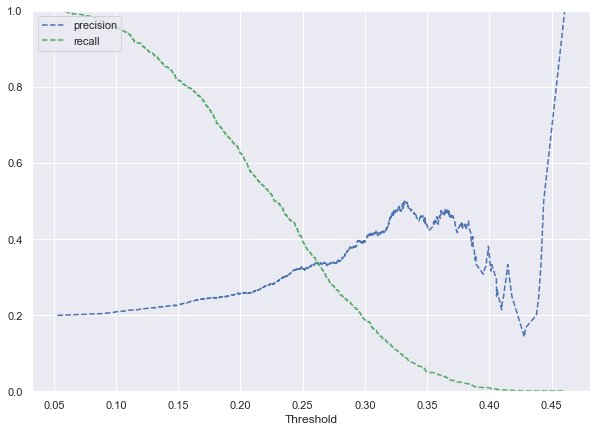

In [ ]:
# Finding the equilibrium of precision and recall so we can see if there is a threshold that will make the model perform better

y_scores_lg = lg.predict_proba(x_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])


plt.show()

**Optimal threshold is about .27**

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3340
           1       0.33      0.29      0.31       832

    accuracy                           0.74      4172
   macro avg       0.58      0.57      0.58      4172
weighted avg       0.73      0.74      0.74      4172



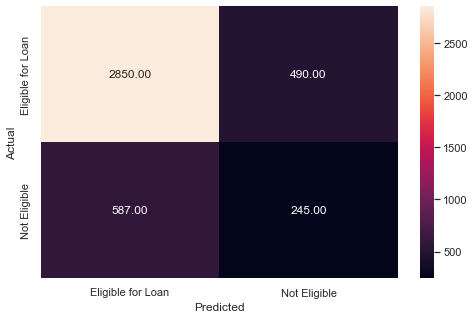

In [ ]:
optimal_threshold1=.27

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:,1] > optimal_threshold1)

**When we rerun the Logistic regression model on the training set with the .27 threshold, the recall goes from 0 to 29%. While this is an improvement, it is still performing very poorly**

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1431
           1       0.37      0.35      0.36       357

    accuracy                           0.75      1788
   macro avg       0.60      0.60      0.60      1788
weighted avg       0.75      0.75      0.75      1788



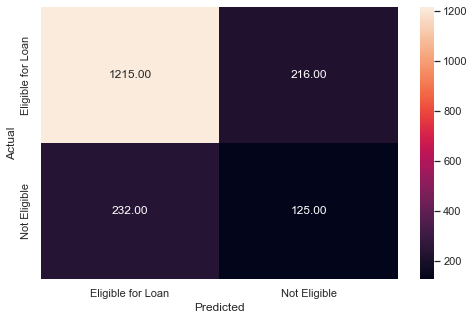

In [ ]:
y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

**On the test data, the model performs slightly better than on the training data, and has a 35% recall, which is still much too low. Logistic Regression is ultimately not a good fit for predicting loan defaults given this data set** 

## K-Nearest Neighbors

**Next I will create a K-Nearest Neighbor model to see if it performs better at this task than the 35% recall of the logistic regression model**

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
#Iterate through different values if K to see what gives us the best balance of training and testing error

train_error = []

test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()

features = x.columns

for k in range(1,15):
    train_error = []
    
    test_error = []
    
    lista = []
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size = 0.2)
        
        knn.fit(x_train_new, y_train_new)
        
        train_error.append(1-knn.score(x_train_new, y_train_new))
        
        test_error.append(1-knn.score(x_val, y_val))
    
    lista.append(sum(train_error)/len(train_error))
    
    lista.append(sum(test_error)/len(test_error))
    
    knn_many_split[k] = lista
    
knn_many_split

{1: [0.0, 0.23920159680638728],
 2: [0.12993706922385378, 0.18522954091816365],
 3: [0.12358405753670962, 0.20343313373253494],
 4: [0.15169313754869646, 0.19033932135728543],
 5: [0.14958545599840178, 0.19005988023952097],
 6: [0.16360003995604835, 0.18662674650698605],
 7: [0.16281090800119866, 0.18487025948103797],
 8: [0.16985316152232546, 0.1820359281437125],
 9: [0.16725601837978224, 0.18706586826347307],
 10: [0.1729697332933773, 0.18187624750499],
 11: [0.1708021176705624, 0.18479041916167666],
 12: [0.1759764259314754, 0.1863872255489022],
 13: [0.1723504145440016, 0.18790419161676652],
 14: [0.17771451403456198, 0.18802395209580833]}

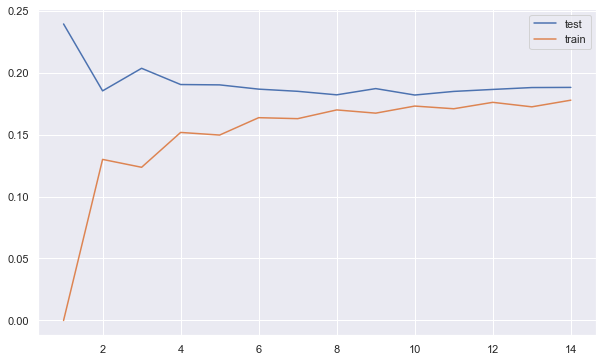

In [ ]:

#graphing results


kltest = []

vltest = []

for k, v in knn_many_split.items():
    kltest.append(k)
    
    vltest.append(knn_many_split[k][1])

kltrain = []

vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    
    vltrain.append(knn_many_split[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

**Based on the results above, 6 is the correct K**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 6)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3340
           1       0.86      0.22      0.35       832

    accuracy                           0.84      4172
   macro avg       0.85      0.61      0.63      4172
weighted avg       0.84      0.84      0.80      4172



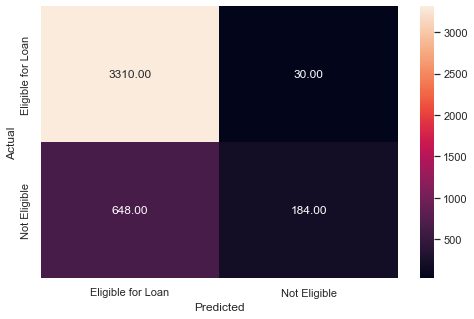

In [ ]:
#fitting the model with K = 6 to the trainig data set

knn.fit(x_train, y_train)

y_pred_train_knn = knn.predict(x_train)

metrics_score(y_train, y_pred_train_knn)

**Recall is 22%. While this is better than the initial Logistic regression, it performs worse than the logistic regress with the .27 threshold**

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1431
           1       0.61      0.12      0.20       357

    accuracy                           0.81      1788
   macro avg       0.71      0.55      0.54      1788
weighted avg       0.78      0.81      0.75      1788



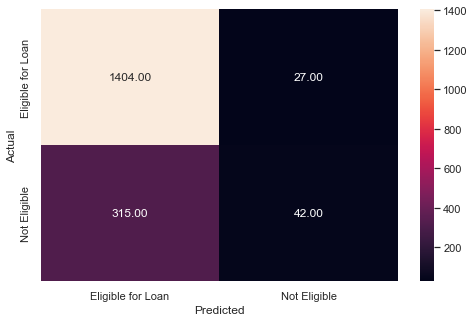

In [ ]:
#trying model on test data
y_pred_test_knn = knn.predict(x_test)

metrics_score(y_test, y_pred_test_knn)

**12% recall. Very poor performance. I will use gridsearch to tune the hyperparameters to see if we can get better performance**

In [ ]:
params_knn = {'n_neighbors': np.arange(3, 15), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(x_train,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')


In [ ]:
knn_estimator.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



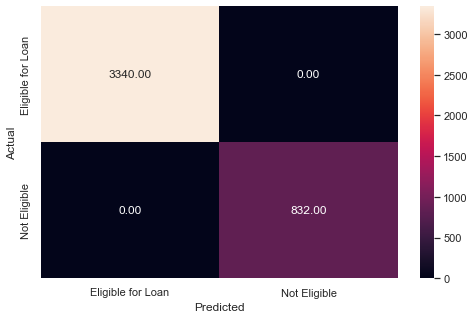

In [ ]:
#using tuned model on training data
y_pred_train_knn_estimator = knn_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_knn_estimator)

**recall on training set with the tuned KNN model in 100%, which is most likely due to overfitting**

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1431
           1       0.51      0.29      0.37       357

    accuracy                           0.80      1788
   macro avg       0.68      0.61      0.63      1788
weighted avg       0.77      0.80      0.78      1788



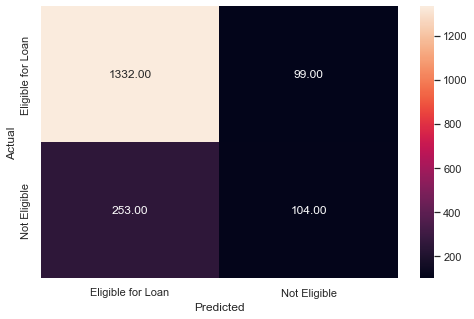

In [ ]:
y_pred_test_knn_estimator = knn_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_knn_estimator)

**Recall on the test data is 29%, which shows conclusively that the model overfit the training set. It is also below the 35% recall for the final logistic regression model, which means that thus far both KNN and Logistic regression are poor fits for predicting defaults, however the logistic regression model with .27 threshold performs the best thus far**

## Decision Tree


**I will now create a decision tree model to see if this gives us better than the 35% recall that we get from the logistic regression model**

In [ ]:
#create decision tree and fit to training data
d_tree = DecisionTreeClassifier(random_state = 22)

d_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



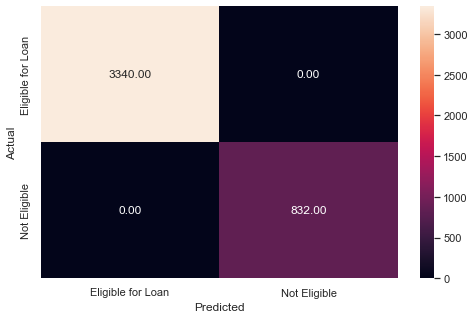

In [ ]:
#check performance on training data
y_pred_train_tree1 = d_tree.predict(x_train)

metrics_score(y_train, y_pred_train_tree1)

**recall is 100%, which most likely means the decision tree is overfitting due to the greedy algorithm**

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1431
           1       0.66      0.68      0.67       357

    accuracy                           0.87      1788
   macro avg       0.79      0.80      0.79      1788
weighted avg       0.87      0.87      0.87      1788



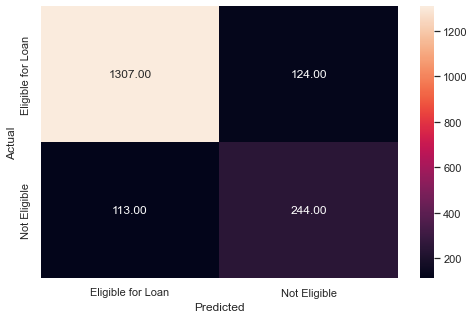

In [ ]:
#trying model on test data
y_pred_test_tree1 = d_tree.predict(x_test)

metrics_score(y_test, y_pred_test_tree1)

**recall is 60%. This is the best result for any of our models by far, however, given the drop from 100% to 60% between the training and test data, it is clear that the model overfits out training data, and we can make improvements. I will use gridsearch to create a more generalized model**

In [ ]:
#gridsearch for better hyperparameters. Using class weight to make the data more heavily weighted towards 1, defaults

d_tree_tuned = DecisionTreeClassifier(random_state = 22, class_weight = {0:0.2, 1: 0.8})

parameters = {'max_depth': np.arange(2,10),
             'criterion': ['gini', 'entropy'],
             'min_samples_leaf': [5,10,20,25]}

scorer = metrics.make_scorer(recall_score, pos_label = 1)

grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

d_tree_tuned = grid_obj.best_estimator_

d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=9,
                       min_samples_leaf=25, random_state=22)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3340
           1       0.59      0.82      0.69       832

    accuracy                           0.85      4172
   macro avg       0.77      0.84      0.79      4172
weighted avg       0.88      0.85      0.86      4172



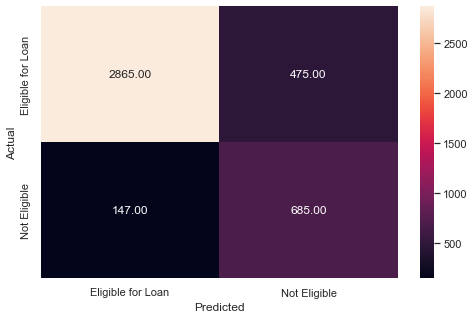

In [ ]:
#checking performance of tuned tree on training data
y_pred_train_tree_tuned = d_tree_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_tree_tuned)

**Recall is 87, which means it is more generalized than the original decision tree**

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1431
           1       0.53      0.75      0.62       357

    accuracy                           0.82      1788
   macro avg       0.73      0.79      0.75      1788
weighted avg       0.85      0.82      0.83      1788



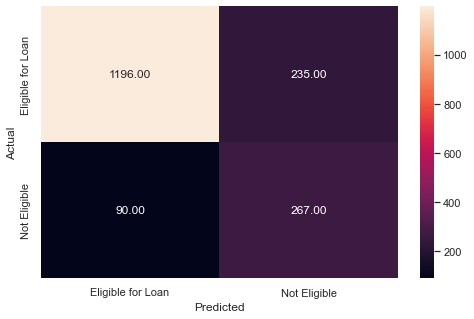

In [ ]:
y_pred_test_tree_tuned = d_tree_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_tree_tuned)

**Recall on the test data is 75, which is a 15 pt improvement from the initial tree. This is our best result thus far, so this will be the model to beat going forward. Lets see what features are most important in our decision tree**

In [ ]:
#using the hyperparameters above, creating a tree with max depth of 3 so that we can visualize and see the high level decsions points
tree_model = DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=3,min_samples_leaf=25, random_state=22)

tree_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=3,
                       min_samples_leaf=25, random_state=22)

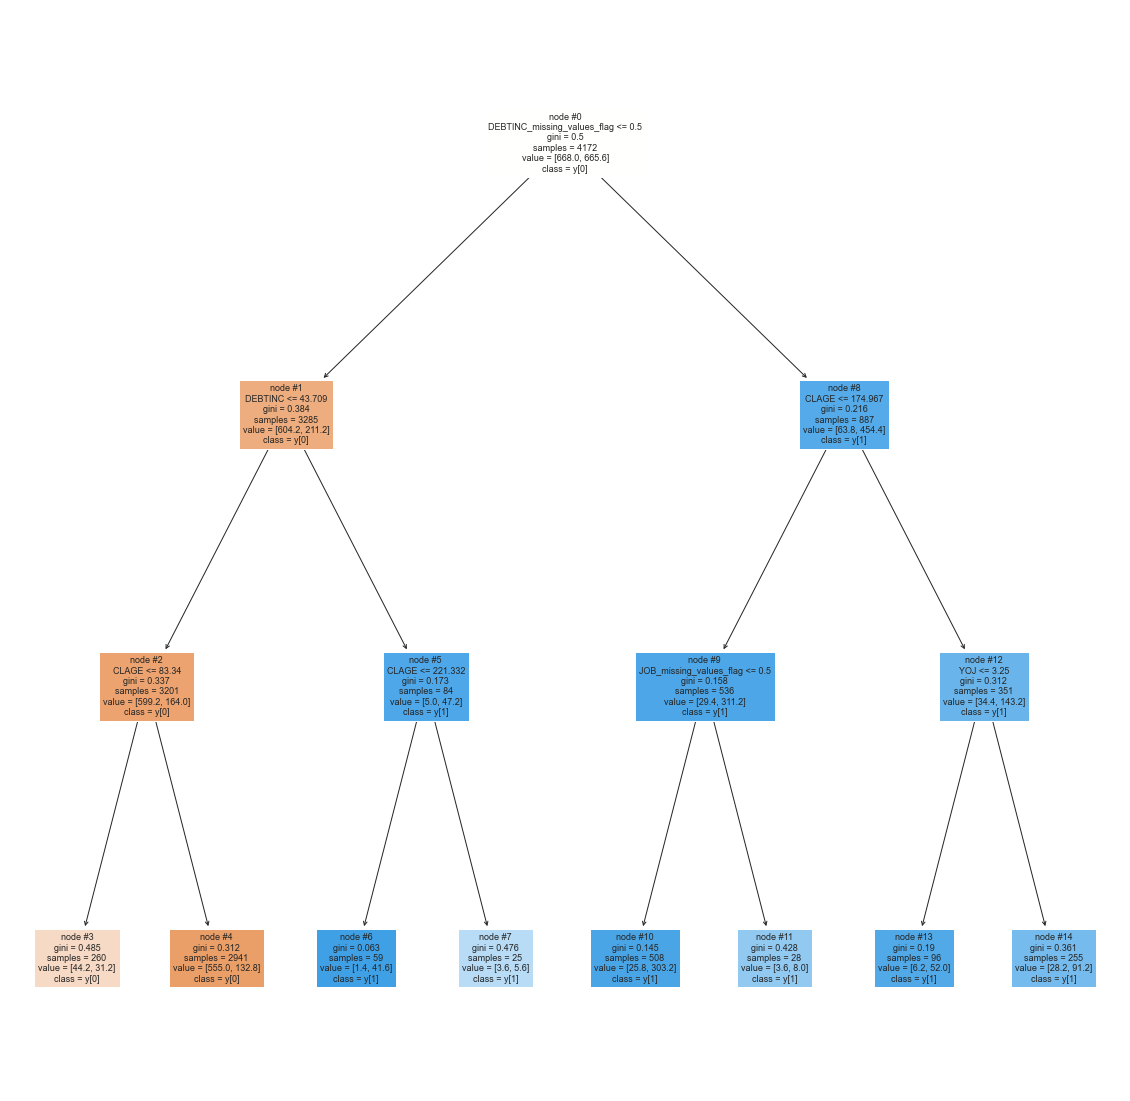

In [ ]:
features = list(x.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**The first decision point is whether Debt to income ratio. If it is 35 or over, then default is likely. The likelihood goes up even further if the age of their oldest credit line is under 175 months. Therefore customers that are likely to default have a high debt to income ratio, and do not have as long of an established credit history as they should**

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
DEBTINC_missing_values_flag  0.663628
DEBTINC                      0.165742
CLAGE                        0.056398
MORTDUE                      0.025873
VALUE                        0.018009
LOAN                         0.017358
YOJ                          0.013993
NINQ                         0.010802
JOB_Office                   0.009342
DEROG_missing_values_flag    0.006135
JOB_missing_values_flag      0.005407
CLNO                         0.005171
CLAGE_missing_values_flag    0.001206
VALUE_missing_values_flag    0.000937
REASON_missing_values_flag   0.000000
MORTDUE_missing_values_flag  0.000000
YOJ_missing_values_flag      0.000000
DELINQ_missing_values_flag   0.000000
NINQ_missing_values_flag     0.000000
CLNO_missing_values_flag     0.000000
DELINQ                       0.000000
REASON_HomeImp               0.000000
DEROG                        0.000000
JOB_Other                    0.000000
JOB_ProfExe                  0.000000
JOB_Sales   

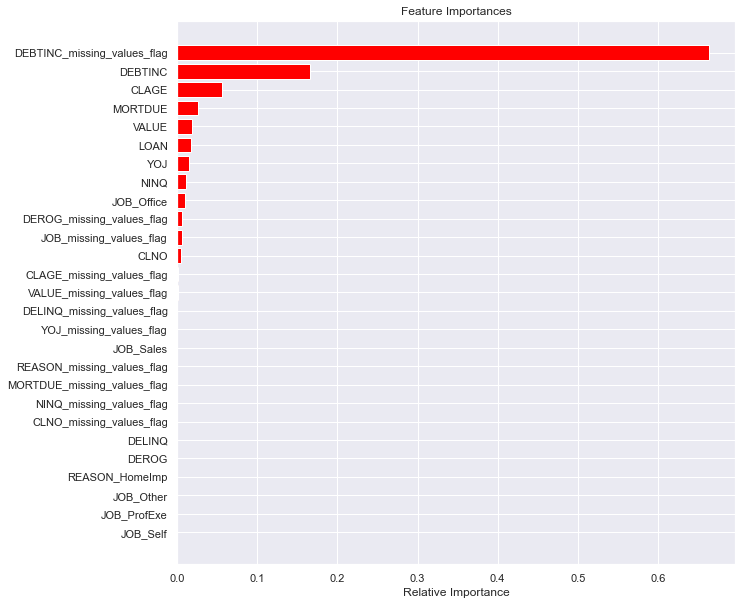

In [ ]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'red', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**As we can see from the above chart and table, Debt to income ration is over 10x more important in predicting default than the next most important feature, age of oldest credit line**

## Random Forest

**We have a decision tree model that gives us 79% recall, but I am going to see if we can improve that any further using a random forest model**

In [ ]:
rf_estimator = RandomForestClassifier(random_state= 22, criterion = 'entropy')

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



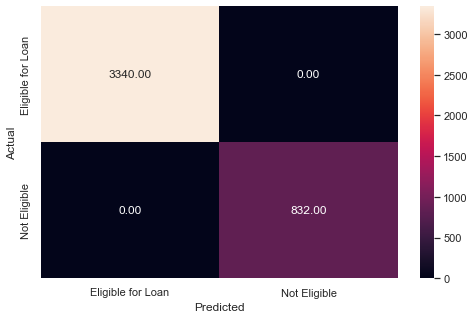

In [ ]:
#checking performance on training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Recall is 100%, which means it is overfit**

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1431
           1       0.73      0.69      0.71       357

    accuracy                           0.89      1788
   macro avg       0.83      0.81      0.82      1788
weighted avg       0.88      0.89      0.89      1788



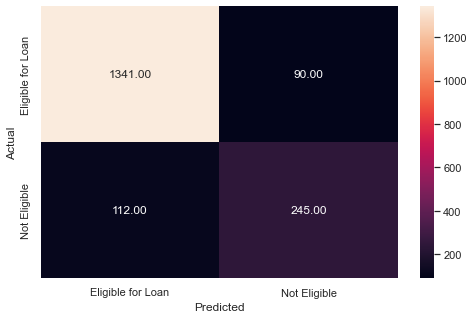

In [ ]:
#checking performance on test data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

**60% recall, confirms that it is overfit. Will use gridsearch to attempt to find an optimal model that performs better than the tuned decision tree**

In [ ]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [80, 90, 100, 110, 120],
    "max_depth": [4,5, 6, 7, 8, 9],
    "min_samples_leaf": [15, 20, 25, 30],
    "max_features": [0.7, 0.8, 0.9, 1],
    "max_samples": [0.7, 0.8, 0.9, 1],
    "class_weight" : ["balanced",{0: 0.2, 1: 0.8}]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=1, max_samples=0.8,
                       min_samples_leaf=20, n_estimators=80, random_state=7)
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=1, max_samples=0.8,
                       min_samples_leaf=20, n_estimators=80, random_state=7)

In [ ]:
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3340
           1       0.63      0.76      0.69       832

    accuracy                           0.86      4172
   macro avg       0.78      0.82      0.80      4172
weighted avg       0.88      0.86      0.87      4172



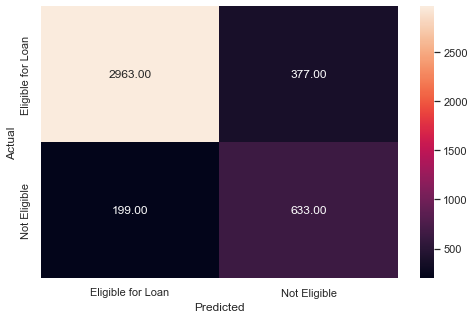

In [ ]:
metrics_score(y_train,y_pred_train_rf_tuned)

**Tuned Random forest has 81% recall on training data**

In [ ]:
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1431
           1       0.55      0.68      0.61       357

    accuracy                           0.83      1788
   macro avg       0.74      0.77      0.75      1788
weighted avg       0.84      0.83      0.83      1788



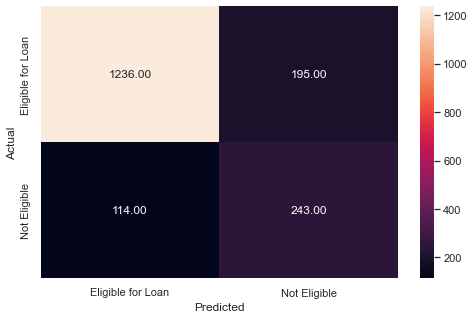

In [ ]:
metrics_score(y_test,y_pred_test_rf_tuned)

**Tuned random forest has 76% recall on test data. While good, this is below the 79% recall of the tuned Decision tree, and it is less interpretable. So we will go with the decision tree model as our final model at this point**

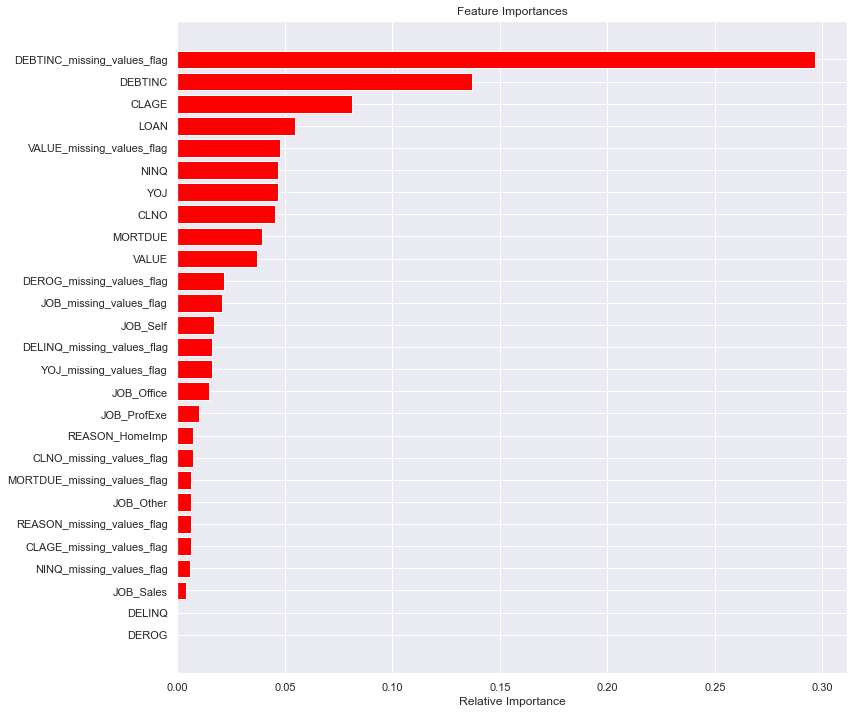

In [ ]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(x.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'red', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**In the tuned random forest model, Debt to income ratio is still the most important feature, but not as overwhelmingly so as with the decsion tree model**

## Comparing Model performance

In [ ]:
def get_recall_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [ ]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [ ]:
# Make the list of all the model names 

models = [lg, knn, d_tree, d_tree_tuned, rf_estimator, rf_estimator_tuned]


# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:

comparison_frame = pd.DataFrame({'Model':["Logistic Regression", 'K-Nearest Neighbors', "Decision Tree", 'Tuned Decision Tree', 'Random Forest', 'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 


In [ ]:
def highlight_cols(x):
      
    # copy df to new - original data is not changed
    df = x.copy()
      
    df.loc[:, :] = 'background-color: pink'
      
    # overwrite values grey color
    df[['Model','Train_Accuracy','Test_Accuracy','Train_Recall','Train_Precision','Test_Precision']] = 'background-color: white'
      
    # return color df
    return df 

In [ ]:
display(comparison_frame.style.apply(highlight_cols, axis = None))

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.800575,0.800336,0.000000,0.000000,0.000000,0.000000
1,K-Nearest Neighbors,0.837488,0.808725,0.221154,0.117647,0.859813,0.608696
2,Decision Tree,1.000000,0.837808,1.000000,0.602241,1.000000,0.592287
3,Tuned Decision Tree,0.842761,0.799776,0.870192,0.792717,0.569182,0.499118
4,Random Forest,1.000000,0.893177,1.000000,0.655462,1.000000,0.774834
5,Tuned Random Forest,0.769175,0.737696,0.813702,0.761905,0.455892,0.414634


**When we line up all of the results, and specifically look at recall on the test data, we can see that the Tuned Decision tree both performs the best, and has the highest interpretability**

## Insights

**1. Refined insights -** Based on the exploratory data analysis, the most important factors in determining if a loan would default were the number of derogatory reports, delinquent payments, and whether they worked as a sales person, or were self employed. After creating several machine learning models, it is clear that in actuality, the most important determinants of whether they will default are their debt to income ratio, and the age of their oldest credit line. Essentially good customers have a good income as compared to the amount of debt they have, and they have a long established credit history

**2. Comparison of various techniques and their relative performance -** Based on the models that I created and tested, Logistic regression and K-Nearest neighbors perform almost exactly as the current processes perform, thus would not be an improvement. Both the decision tree and Random Forest perform much better out of the box, but perform especially well once they are tuned properly. Ultimately, we get the best performance out of the tuned decision tree

**3. Proposal for the final solution design -** I propose that the final model will be a decision tree with the class weight at {0: 0.2, 1: 0.8}, max depth of 9, and min samples leaf of 25. These are the hyper parameters we got after performing a Grid Search cross validation, and they ensure that the model does not overfit the training data, and has a 79% recall on the test data. I believe that this solution is the best because the root cause of defaulting is so heavily weighted towards Debt to income ration, which is over 10x more of a factor in determining default than the next highest factor, age of oldest credit line. Because it is such a strong factor, when we run a random forest, which randomly samples the features, it may not be present in some of the trees, thus the recall isnt quite as high as it is with the decision tree. 